# Generate Synthetic Data

In [1]:
from act.SyntheticGenerator import SyntheticGenerator
from act.act_types import SimParams, OptimizationParameters
from act.cell_model import TargetCell, ModuleParameters

target_cell = TargetCell(
    hoc_file="/home/mwsrgf/proj/ACT/data/Spiker/orig/template.hoc",
    mod_folder="/home/mwsrgf/proj/ACT/data/Spiker/orig/modfiles",
    cell_name="Simple_Spiker_orig",
    g_names = ["gnabar_hh_orig", "gkbar_hh_orig", "gl_hh_orig"]
)

sg = SyntheticGenerator(
    ModuleParameters(
        module_folder_name="spiker_original",
        cell= target_cell,
        sim_params= SimParams(
            h_v_init=-67.0,  # Consistent with nrngui settings
            h_tstop=400,     # Simulation time in ms
            h_dt=1,      # Time step in ms
            h_celsius=6.3,   # Temperature in degrees Celsius
            CI_type="constant",
            CI_amps=[0.0, 0.1, 0.5, 1.0, 2.0],   # Current injection amplitude
            CI_dur=350,      # Duration of current injection
            CI_delay=50,     # Delay before current injection
            set_g_to=[]
        ),
        optim_params = OptimizationParameters(
            blocked_channels= []
        )
    )
)

sg.generate_synthetic_target_data("target_data.csv")

/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


Blocking: []
Total number of jobs: 5
Total number of proccessors: 192

Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':




  Segment 0.5:  Segment 0.5:  Segment 0.5:  Segment 0.5:  Segment 0.5:




    Mechanism 'k_ion':    Mechanism 'k_ion':    Mechanism 'k_ion':    Mechanism 'k_ion':    Mechanism 'k_ion':




      dik_dv_ = 0.0      dik_dv_ = 0.0      dik_dv_ = 0.0      dik_dv_ = 0.0      dik_dv_ = 0.0




      ek = -77.0      ek = -77.0      ek = -77.0      ek = -77.0      ek = -77.0




      ik = 0.0      ik = 0.0      ik = 0.0      ik = 0.0      ik = 0.0




      ki = 54.4      ki = 54.4      ki = 54.4      ki = 54.4      ki = 54.4




      ko = 2.5      ko = 2.5      ko = 2.5      ko = 2.5      ko = 2.5




    Mechanism 'na_ion':    Mechanism 'na_ion'

(400,)


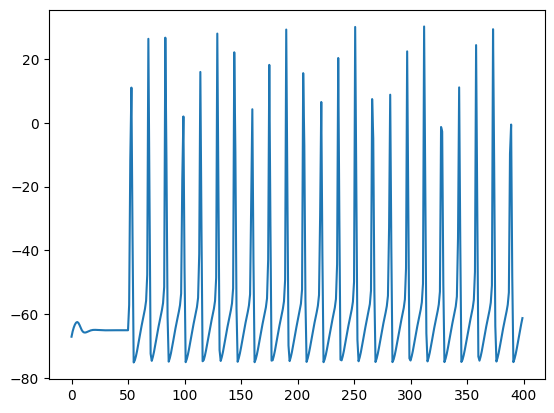

In [2]:
import numpy as np
dataset = np.load('./model/spiker_original/synthetic_0.0_0.1_0.5_1.0_2.0_/combined_out.npy')

V = dataset[1,:,0]
print(V.shape)

from matplotlib import pyplot as plt

plt.plot(V)

In [3]:
sg_passive = SyntheticGenerator(
    ModuleParameters(
        module_folder_name="spiker_original",
        cell= target_cell,
        sim_params= SimParams(
            h_v_init = -54.3,
            h_tstop = 1000,
            h_dt = 1,
            h_celsius = 6.3,
            CI_type = "constant",
            CI_amps = [-0.01],    ##################### NEGATIVE CURRENT INJECTION ###################
            CI_dur = 600,
            CI_delay = 200,
            set_g_to=[]
        ),
        optim_params = OptimizationParameters(
            blocked_channels= ["gnabar_hh_orig", "gkbar_hh_orig"]
        )
    )
)

sg_passive.generate_synthetic_target_data("passive_data.csv")

Blocking: ['gnabar_hh_orig', 'gkbar_hh_orig']
Total number of jobs: 1
Total number of proccessors: 192
MECHANISMS already loaded.

Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
  Segment 0.5:
    Mechanism 'k_ion':
      dik_dv_ = 0.0
      ek = -77.0
      ik = 0.0
      ki = 54.4
      ko = 2.5
    Mechanism 'na_ion':
      dina_dv_ = 0.0
      ena = 50.0
      ina = 0.0
      nai = 10.0
      nao = 140.0
    Mechanism 'hh_orig':
      el = -54.3
      gk = 0.0
      gkbar = 0.0
      gl = 0.0003
      gna = 0.0
      gnabar = 0.0
      h = 0.0
      il = 0.0
      m = 0.0
      n = 0.0
/home/mwsrgf/proj/ACT/model/spiker_original/synthetic_-0.01_


(1000,)


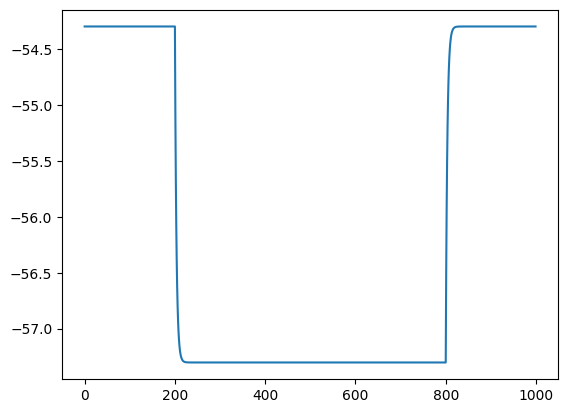

In [4]:
import numpy as np
dataset = np.loadtxt('./model/spiker_original/target/passive_data.csv', delimiter=',', skiprows=1)

V = dataset[:,0]
print(V.shape)

from matplotlib import pyplot as plt

plt.plot(V)

# Get Passive Properties

In [5]:
from act.PassivePropertiesModule import PassivePropertiesModule
from act.act_types import SimParams
from act.cell_model import TrainCell

train_cell = TrainCell(
    hoc_file="/home/mwsrgf/proj/ACT/data/Spiker/orig/template.hoc",
    mod_folder="/home/mwsrgf/proj/ACT/data/Spiker/orig",
    cell_name="Simple_Spiker_orig",
    g_names = ["gnabar_hh_orig", "gkbar_hh_orig", "gl_hh_orig"]
)

passive_mod = PassivePropertiesModule(
    train_cell=train_cell,
    sim_params=SimParams(
            h_v_init = -54.3,
            h_tstop = 1000,
            h_dt = 1,
            h_celsius = 6.3,
            CI_type = "constant",
            CI_amps = [-0.01],    ##################### NEGATIVE CURRENT INJECTION ###################
            CI_dur = 600,
            CI_delay = 200,
            set_g_to=[]
        ),
    trace_filepath='./model/spiker_original/target/passive_data.csv',
    leak_conductance_variable="gl_hh_orig",
    leak_reversal_variable="el_hh_orig"
)

In [6]:
passive_mod.set_passive_properties()
print(train_cell.passive_properties)

MECHANISMS already loaded.
Found 1 section(s) in this cell. Calculating the total surface area of the cell.
PassiveProperties(V_rest=-54.3, R_in=300.20171852246517, tau=4.0, Cm=0.013324374089819428, g_bar_leak=0.00030000000000004746, cell_area=1.1103645074847766e-05, leak_conductance_variable='gl_hh_orig', leak_reversal_variable='el_hh_orig')


# Run Original Pipeline with Passive Prediction

In [7]:
from act.ACTModule import ACTModule
from act.SyntheticGenerator import SyntheticGenerator
from act.act_types import  Cell, SimParams, OptimizationParameters, OptimizationParam
from act.cell_model import ModuleParameters
from act.PassivePropertiesModule import PassivePropertiesModule
from act.act_types import SimParams
from act.cell_model import TrainCell

mod = ACTModule(
    ModuleParameters(
        module_folder_name="spiker_original",
        cell= train_cell,
        target_traces_file = "target_data.csv",
        sim_params= SimParams(
            h_v_init=-67.0,  # Consistent with nrngui settings
            h_tstop=400,     # Simulation time in ms
            h_dt=0.025,      # Time step in ms
            h_celsius=6.3,   # Temperature in degrees Celsius
            CI_type="constant",
            CI_amps=[0.0, 0.1, 0.5, 1.0, 2.0],   # Current injection amplitude
            CI_dur=350,      # Duration of current injection
            CI_delay=50,     # Delay before current injection
            set_g_to=[]
        ),
        optim_params= OptimizationParameters(
            g_ranges_slices= [
                OptimizationParam(param="gnabar_hh_orig", low=0.12, high=0.12, n_slices=2),
                OptimizationParam(param="gkbar_hh_orig", low=0.036, high=0.036, n_slices=2),
                OptimizationParam(param="gl_hh_orig", prediction=train_cell.passive_properties.g_bar_leak, bounds_variation=0.0, n_slices=1)
            ]
        )
    )
)

In [8]:
predicted_g_data_folder = mod.run()

RUNNING THE MODULE
LOADING TARGET TRACES
SIMULATING TRAINING DATA
Total number of jobs: 20
Total number of proccessors: 192
MECHANISMS already loaded.

Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':


Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':







Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':

  Segment 0.5:  Segment 0.5:
Mechanisms in section 'Simple_Spiker_or

100%|██████████| 5/5 [00:00<00:00,  6.40it/s]

-------------------------------------------------
GENERATING ARIMA STATS
-------------------------------------------------
ARIMA order set to (4, 0, 4)



100%|██████████| 20/20 [00:01<00:00, 16.43it/s]


Evaluating random forest
MAE: 0.000000 (0.000000)
Predicted Conductances for each current injection intensity: [[0.12   0.036  0.0003]
 [0.12   0.036  0.0003]
 [0.12   0.036  0.0003]
 [0.12   0.036  0.0003]
 [0.12   0.036  0.0003]]
SIMULATING PREDICTIONS
Total number of jobs: 25
Total number of proccessors: 192
MECHANISMS already loaded.

Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':
Mechanisms in section 'Simple_Spiker_orig[0].soma[0]':

In [9]:
print(train_cell.predicted_g)

{'gnabar_hh_orig': 0.12000000000000152, 'gkbar_hh_orig': 0.03600000000000063, 'gl_hh_orig': 0.00030000000000004524}


In [10]:
from act import ACTPlot
ACTPlot.plot_v_comparison(predicted_g_data_folder, "./model/spiker_original/target", "./model/spiker_original", [0.0, 0.1, 0.5, 1.0, 2.0])
ACTPlot.plot_fi_comparison("./model/spiker_original/results/frequency_data_0.npy", [0.0, 0.1, 0.5, 1.0, 2.0])